# Mango variant visualization tools 
bdgenomics.mango.variantViz

Note: where “population” is required as a parameters such as “AF_AFR” - allele frequency African/African American, see list of populations at: https://macarthurlab.org/2017/02/27/the-genome-aggregation-database-gnomad/

### Load data

In [ ]:
%matplotlib inline
from bdgenomics.adam.adamContext import ADAMContext
#from bdgenomics.adam.rdd import AlignmentRecordRDD, CoverageRDD
import matplotlib.pyplot as plt
ac = ADAMContext(spark)
data_variants = ac.loadVariants("../genodata.v3.vcf")
data_geno = ac.loadGenotypes("../genodata.v3.vcf")

### Plot variant density across chromosome region

In [ ]:
from bdgenomics.mango.variantViz import VariantDensityDistribution

#Retrieve position binned density
contigName="22"
varDensityData = VariantDensityDistribution(spark,data, start=0, end=1000000000,contigName=contigName)
position_bin, variant_count = varDensityData.plot()

#Plot
plt.plot( position_bin, variant_count)
plt.title("Variant density on chromosome " + contigName)
plt.xlabel("position (MB)")
plt.ylabel("Variant Count / MB")
plt.show()

### Plot Histogram of Quality By Depth (QD) score from a variant dataset

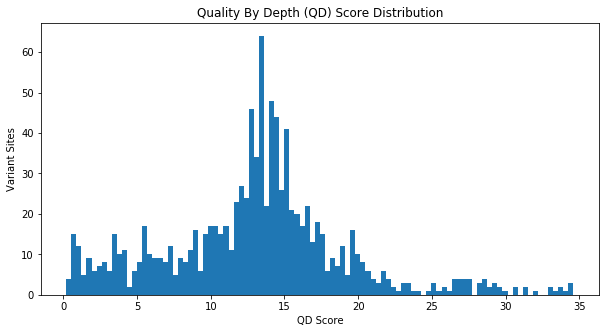

In [2]:
from bdgenomics.mango.variants import QualityByDepthDistribution

ax, results = QualityByDepthDistribution(spark,data_variants).plot()

if(ax != None):
    ax.set_title("Quality By Depth (QD) Score Distribution")
    ax.set_xlabel("QD Score")
    ax.set_ylabel("Variant Sites")
    plt.show()
    

### Plot Histogram of the heterozygote/homozygote genotype ratio

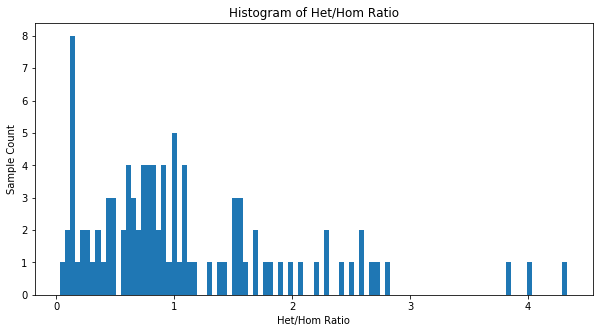

In [3]:
from bdgenomics.mango.variants import HetHomRatioDistribution

ax, results = HetHomRatioDistribution(spark, data_geno).plot()

if(ax != None):
    ax.set_title("Histogram of Het/Hom Ratio")
    ax.set_xlabel("Het/Hom Ratio")
    ax.set_ylabel("Sample Count")
    plt.show()
    

### Plot histogram of callrate per sample

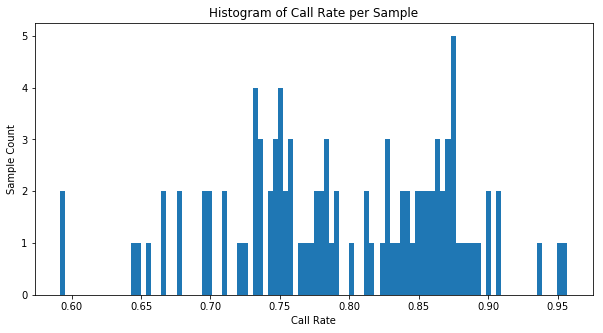

In [4]:
from bdgenomics.mango.variants import GenotypeCallRatesDistribution

ax, results = GenotypeCallRatesDistribution(spark, data_geno).plot()

if(ax != None):
    ax.set_title("Histogram of Call Rate per Sample")
    ax.set_xlabel("Call Rate")
    ax.set_ylabel("Sample Count")
    plt.show()


In [5]:
### Plot histogram of Variant Count per Sample

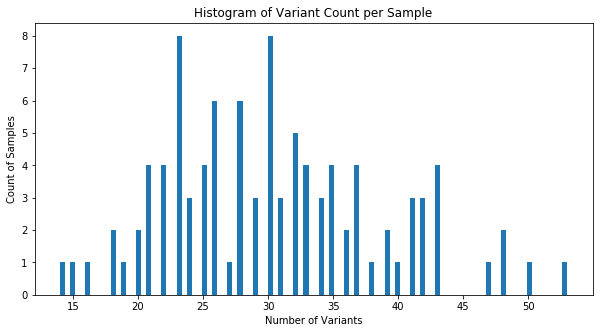

In [6]:
from bdgenomics.mango.variants import VariantsPerSampleDistribution

ax, results = VariantsPerSampleDistribution(spark, data_geno).plot()
if(ax != None):
    ax.set_title("Histogram of Variant Count per Sample")
    ax.set_xlabel("Number of Variants")
    ax.set_ylabel("Count of Samples")
    plt.show()
    